# Linear Regression in Machine Learning

Welcome to this Python Notebook!

In this assignment you will dive deeper into linear regression. Let's do a short recap first.

**What is Linear Regression?**

Linear Regression is an supervised-learning algorithm that predicts the linear relationship between a dependent (float output) and one or more independent variables. Labeled data is used to learn the linear relationship, which can then be used to make predictions.

For example, the following data points are given. To illustrate the data, let´s say the x-value represents the area of a house and the y-value represents the price of the house. Each datapoint represents a house for which the area and price are known.

<img src="images/datapoints.png" style="width:400px">

The relationship between x and y, i.e. the area and the price, can now be analyzed using linear regression. The relationship, i.e. the straight line, can be described mathematically by the following equation:
$$h(x) = wx + b$$
w is a 'weight' parameter and b is called 'bias'. These parameters can be learned by a linear regression model.

<img src="images/linear_relationship.PNG" style="width:400px">

This equation can now be used to predict the price of a house for a given area.

<img src="images/prediction.PNG" style="width:400px">

This is an example of simple linear regression. There is only one independent variable (the area).


Let´s start with the assignment!

# 1 - Import and visualize the data



In [1]:
import numpy as np  # to perform mathematical operations
import matplotlib.pyplot as plt # to create plots and visualize data
from matplotlib.animation import FuncAnimation # for working with data sets
import pandas as pd

**Problem Statement:** You are the head of the marketing team. Your task is to find the correlation between the monthly expenditure on advertising and the company's profit. For this you receive a data set containing the expenditure and the profit. You will use linear regression to find the correlation.

First, let´s import the data and visualize it.

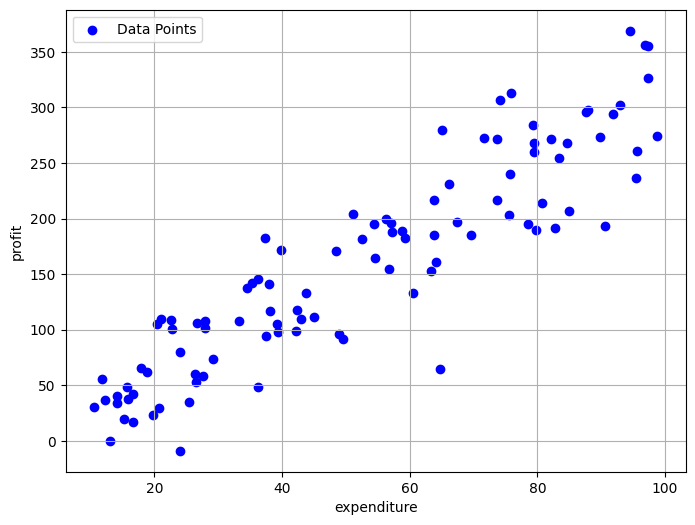

In [2]:
path = "datasets/data.csv"
data = pd.read_csv(path)
data = data.dropna()    # drop all rows that have any NaN values
data['x'] = data['x'].astype(float)   # convert the data type of column x to float
data['y'] = data['y'].astype(float)   # convert the data type of column y to float
data_points_to_be_included = 100
train_input = np.array(data.x[0:data_points_to_be_included]).reshape(data_points_to_be_included, 1)
train_output = np.array(data.y[0:data_points_to_be_included]).reshape(data_points_to_be_included, 1)

plt.figure(figsize=(8, 6))
plt.scatter(train_input.tolist(), train_output.tolist(), color='blue', label='Data Points')
plt.xlabel('expenditure')
plt.ylabel('profit')
plt.legend()
plt.grid(True)
plt.show()

# 2 - Cost Function #

Now that we have our data we want to build a model to learn the parameters for the linear regression. For this we use the mean squared error as cost function.

$$ J = \frac{1}{2m} \sum_{i=1}^m (h(x)-y)^2$$

Where:

- m is the number of data points
- h(x) is the predicted value
- y is the actual value

By squaring the deviations, they are always positive, preventing negative and positive deviations from canceling each other out. Additionally, this weighting scheme gives larger errors more significance in the evaluation of the model's performance.

**Exercise:** Implement the cost function as defined above.

In [3]:
def compute_cost(yhat, y):
    """
    Arguments:
    yhat -- predicted values
    y -- actual values

    Returns:
    cost -- the value of the cost function defined above
    """
    ### START CODE HERE ### (≈ 2 line of code)
    diff = yhat - y
    cost = np.multiply(1/(2*y.shape[0]), np.dot(diff.T, diff))
    ### END CODE HERE ###

    return cost

In [4]:
yhat = np.array([1.3, 5.4, 3.8, 4.9, 6.1, 8.6, 7.7])
y = np.array([1.8, 5.2, 4.8, 4.4, 6.2, 8.1, 8.5])
cost = compute_cost(yhat, y)
print("cost: ", cost)

cost:  0.17428571428571424


**Expected Output**: 
<table style="width:20%">
     <tr> 
       <td> cost </td> 
       <td> 0.1743 </td> 
     </tr>
</table>

# 3 - Gradient Descent #

To minimize the cost function we use gradient descent. First, the prediction of the model is calculated using the current parameters (forward propagation). Then the current costs can be calculated using the cost function. After that the gradient of the cost function can be calculated to update the parameters (backward propagation). This process is repeated iteratively. During this training, the costs decrease and the parameters of the model are optimized.

**Exercise:** Implement the forward propagation to calculate the prediction.


In [5]:
def forward_propagation(w, b, X):
    """
    Implement the predictions of our model

    Arguments:
    w -- weight
    b -- bias
    X -- input data

    Return:
    predictions -- the predictions of our model
    """
    ### START CODE HERE ### (≈ 1 line of code)
    predictions = np.add(np.multiply(w, X), b)
    ### END CODE HERE ###
    return predictions

In [6]:
w = 1.5
b = 14.7
X = [3.4, 6.9, 2.1, 9.8, 5.7, 3.8, 1.6, 8.6]
prediction = forward_propagation(w, b, X)

print('prediction:',prediction)

prediction: [19.8  25.05 17.85 29.4  23.25 20.4  17.1  27.6 ]


**Expected Output**: 
<table style="width:50%">
     <tr> 
       <td> prediction </td> 
       <td> [19.8  25.05 17.85 29.4 23.25 20.4 17.1 27.6 ] </td> 
     </tr>
</table>

**Exercise**: Implement the backward propagation using the appropriate gradients


$$ \frac{\partial J}{\partial w} = ?$$
$$ \frac{\partial J}{\partial b} = ?$$


In [7]:
def backward_propagation(X, Y_pred, Y):
    """
    Implement the backward propagation

    Arguments:
    X -- input data
    Y_pred -- predicted values
    Y -- actual values

    Return:
    dw -- gradient of the loss with respect to w
    db -- gradient of the loss with respect to b
    """
    m = Y.shape[0]
    ### START CODE HERE ### (≈ 2 line of code)
    dw = np.multiply(1/m, np.dot(X.T, (Y_pred - Y)))
    db = np.multiply(1/m, np.sum(Y_pred - Y))
    ### END CODE HERE ###

    return dw, db

In [8]:
X = np.array([3.4, 6.9, 2.1, 9.8, 5.7, 3.8, 1.6])
Y_pred = np.array([1.3, 5.4, 3.8, 4.9, 6.1, 8.6, 7.7])
Y = np.array([1.8, 5.2, 4.8, 4.4, 6.2, 8.1, 8.5])

dw, db = backward_propagation(X, Y_pred, Y)
print("dw:", dw)
print("db:", db)

dw: 0.3614285714285712
db: -0.17142857142857146


**Expected Output**: 
<table style="width: 30%">
     <tr> 
       <td> dw </td> 
       <td> 0.3614 </td> 
     </tr>
     <tr> 
       <td> db </td> 
       <td> -0.1714 </td> 
     </tr>
</table>

**Exercise:** Implement the function to update the parameters. The update rule is $ \theta := \theta - \alpha \text{ } d\theta$ , where $\theta$ is a parameter and $\alpha$ is the learning rate.

In [9]:
def update_parameters(w, b, dw, db, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    w -- weight
    b -- bias
    dw -- gradient
    db -- gradient
    learning_rate

    Returns:
    w -- updated weight
    b -- updated bias
    """
    ### START CODE HERE ### (≈ 2 line of code)
    w = w - np.multiply(learning_rate, dw)
    b = b - np.multiply(learning_rate, db)
    ### END CODE HERE ###
    return w, b

In [10]:
w, b = update_parameters(4, 3, 0.72, -0.34, 0.1)
print("updated w", w)
print("updated b:", b)

updated w 3.928
updated b: 3.034


**Expected Output**: 
<table style="width: 30%">
     <tr> 
       <td> w </td> 
       <td> 3.928 </td> 
     </tr>
     <tr> 
       <td> b </td> 
       <td> 3.034 </td> 
     </tr>
</table>

# 4 - Build the model #

Now we can combine the functions we implemented in the previous part to create a model.

**Exercise:** Implement the training procedure. You need to iterate over the given `num_iterations` and update both of your parameters on every step. 
Print the cost to the console every 10 iterations!

In [11]:
def train_model(X, Y, num_iterations=200, learning_rate=0.001, print_cost=True):
    """
    Trains the model using gradient descent

    Arguments:
    X -- input data
    Y -- values of the dependent variable
    num_iterations -- number of iterations to optimize the parameters
    learning_rate -- learning rate used to update the parameters
    print_cost -- prints costs every 10 iterations if set to true

    Returns:
    w -- weight learned by the model
    b -- bias learned by the model
    """
    w = np.zeros((X.shape[1], 1))
    b = 0
    ### START CODE HERE ###
    for i in range(num_iterations):
        Y_pred = forward_propagation(w, b, X)
        dw, db = backward_propagation(X, Y_pred, Y)
        w, b = update_parameters(w, b, dw, db, learning_rate)

        if print_cost and i % 10 == 0:
            print(f"Iteration {i}: cost = {compute_cost(Y_pred, Y)}")
    ### END CODE HERE ###
    return w, b


In [12]:
w, b = train_model(train_input, train_output, num_iterations=100, learning_rate=0.0005)
print('w:', w)
print('b:', b)

Iteration 0: cost = [[17090.30597637]]
Iteration 10: cost = [[781.29488527]]
Iteration 20: cost = [[755.93467235]]
Iteration 30: cost = [[755.88641776]]
Iteration 40: cost = [[755.87752724]]
Iteration 50: cost = [[755.86871604]]
Iteration 60: cost = [[755.85992305]]
Iteration 70: cost = [[755.85114814]]
Iteration 80: cost = [[755.84239128]]
Iteration 90: cost = [[755.83365243]]
w: [[3.07899129]]
b: -0.019611734408352316


**Expected Output**: 
<table style="width: 30%">
     <tr> 
       <td> w </td> 
       <td> 3.080 </td> 
     </tr>
     <tr> 
       <td> b </td> 
       <td> -0.019 </td> 
     </tr>
</table>

Run the next two cells to see the animation of the model.

In [13]:
from matplotlib.animation import PillowWriter
def visualize_training_of_model(X, Y, num_iterations=200, learning_rate=0.01):
    fig, ax = plt.subplots()
    plt.scatter(X, Y, color='blue', label='Data Points')
    line, = plt.plot(X, 0*X, color='red', label='Regression Line')
    plt.title('Linear Regression')
    plt.xlabel('expenditure')
    plt.ylabel('profit')
    plt.legend()

    w = np.zeros((X.shape[1], 1))
    b = 0
    def update(frame):
        nonlocal w, b
        prediction = forward_propagation(w, b, X)
        cost = compute_cost(prediction, Y)
        dw, db = backward_propagation(X, prediction, Y)
        w, b = update_parameters(w, b, dw, db, learning_rate)
        line.set_data(X, w*X+b)
        plt.title('Linear Regression - Iteration: {}, Cost: {}'.format(frame, cost))
    ani = FuncAnimation(fig, update, frames=num_iterations, repeat=False, interval=200)
    writergif = PillowWriter(fps=5)
    ani.save('animation.gif', writer=writergif)


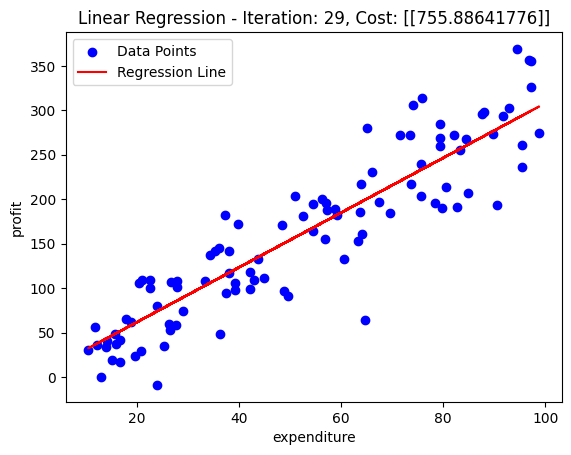

In [15]:
visualize_training_of_model(train_input, train_output, num_iterations=30, learning_rate=0.0005)

<img src="animation.gif" width="750" align="center">

In the animation, you can observe how your own model gets better with every iteration.

Congratulations, with the help of linear regression you have successfully found the correlation between advertising expenditure and the company's profit!

<font color='red'>
**What you should remember about linear regression:**

- Linear regression is a supervised learning algorithm used for predicting an outcome based on input features

- The model assumes a linear relationship between the input features and the target variable

- The goal of linear regression is to find the best-fitting line by minimizing the sum of squared differences between the predicted and actual values

- Linear regression can be extended to multiple variables

Resources used for this exercise:
- DHBW Student input from Kim Nguyen